# Reading in file and converting timestamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress

from datetime import datetime
from dateutil.parser import parse

import math
import os
import copy

In [2]:
# Reading the text file
product_descriptions = pd.read_csv('product_rating_modified.txt', header = None, sep = '\', \'', engine = 'python')
product_descriptions.columns = ['trans_id', 'mkt_id', 'vendor_id','vendor_name', 'buyer_name', \
                                'rating', 'comment', 'date', 'bitcoin_amt', 'USD', 'EUR', \
                                'buyer_#_orders', 'buyer_value_orders', 'product_id', 'product_mkt_id', 'product_title']

In [3]:
product_descriptions[product_descriptions.iloc[:,11]!=-1]

,trans_id,mkt_id,vendor_id,vendor_name,buyer_name,rating,comment,date,bitcoin_amt,USD,EUR,buyer_#_orders,buyer_value_orders,product_id,product_mkt_id,product_title
2826,'3924,5,2647,eee099338c88f65006f24063ff3aca46,d***e,5.0,"FFT best vendor dealt with, professional and a...",20180411154023,-1.0,-1.0,12555.60,1,-1,8193,0096c8e30e2b,*LIMITED* 7 grams CRAZY CARTEL COKE (CCC)
2827,'3925,5,2647,eee099338c88f65006f24063ff3aca46,r***9,5.0,Great vendor and products.,20180106003052,-1.0,-1.0,346.36,1,-1,8193,0096c8e30e2b,*LIMITED* 7 grams CRAZY CARTEL COKE (CCC)
2828,'3926,5,2648,acc3ebb6a498d7b138f3242e235cf65e,s***h,5.0,No message leaved,20181007144938,-1.0,-1.0,5920.76,23,-1,8198,b52a9a2cf312,? 1g Ketamine High Quality 87% ? EC LABTESTED ...
2829,'3927,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,5.0,Best shop is here! Delivery always fast and st...,20180830122846,-1.0,-1.0,11594.10,56,-1,8200,68989469407d,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2830,'3928,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,5.0,"Best quality ever! \nFastest delivery, Super s...",20180806051408,-1.0,-1.0,8537.35,56,-1,8200,68989469407d,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2831,'3929,5,2648,acc3ebb6a498d7b138f3242e235cf65e,A***9,5.0,"Very high quality K, good stealth",20180628125023,-1.0,-1.0,94.40,6,-1,8200,68989469407d,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2832,'3930,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,5.0,"Best Vendor Ever!\nGreat Ketamine quality, sup...",20180525161910,-1.0,-1.0,93.41,56,-1,8200,68989469407d,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2833,'3931,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,0.0,"ordered 10g - it\'s never arrived, vendor agre...",20181025120606,-1.0,-1.0,19432.10,56,-1,8202,569442a1d6b2,? 10g Ketamine High Quality 87% ? EC LABTEST...
2834,'3932,5,2648,acc3ebb6a498d7b138f3242e235cf65e,T***2,5.0,TOP,20180607171603,-1.0,-1.0,180.79,24,-1,8202,569442a1d6b2,? 10g Ketamine High Quality 87% ? EC LABTEST...
2835,'3933,5,2648,acc3ebb6a498d7b138f3242e235cf65e,T***g,5.0,All good. Quality vendor - RECOMMENDED.,20180531142437,-1.0,-1.0,184.06,87,-1,8202,569442a1d6b2,? 10g Ketamine High Quality 87% ? EC LABTEST...


In [4]:
# Only get transactions in Market 1
product_descriptions = product_descriptions[product_descriptions.iloc[:,1] == 1]
# product_descriptions = product_descriptions[product_descriptions.iloc[:,1] == 6]

In [5]:
product_descriptions.groupby('mkt_id').count()

,trans_id,vendor_id,vendor_name,buyer_name,rating,comment,date,bitcoin_amt,USD,EUR,buyer_#_orders,buyer_value_orders,product_id,product_mkt_id,product_title
mkt_id,,,,,,,,,,,,,,,
1,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388


In [6]:
product_descriptions.shape

(92388, 16)

In [7]:
# Function to convert numeric time to datetime object
def parseDate(raw_date, pattern = '%Y%m%d%H%M%S'):
    string_date = str(raw_date)
    return(datetime.strptime(string_date, pattern))

# Parse the dates, and place in new column
product_descriptions['dates'] = product_descriptions.iloc[:,7].apply(parseDate)

# Tokenizing Product Description

In [8]:
import spacy
from spacy.lang.en import English
parser = English()

In [9]:
# Function to tokenize titles
def tokenize_1(title):
    tokens = parser(title.lower())
    tokens = [token.orth_ for token in tokens if not token.orth_.isspace()]
    return(tokens)

In [10]:
# Apply tokenizer to the titles in the dataframe
product_descriptions['tokenized_titles'] = product_descriptions.iloc[:,15].apply(tokenize_1)

In [11]:
# Alternative tokenizer
special_char =['`','\'','=','-','~','!','@','#','$','^','&','*','(',')','_','+','[',']','{','}',';','\\',':','|','<','<','>','?','//']

def remove_special_char(string):
    for char in special_char:
        string = string.replace(char,' ')
    return(string)

def tokenize(string):
    return remove_special_char(string).split()

# Categorize drugs

In [12]:
import drugLookup

Get list of slang phrases that are multiple words

In [13]:
# Load drugs dictionary
drugs_dict = drugLookup.get_drugs_dict()

complete_multi_word_list = []

drug_index = 0
#For loop that gets all the synonyms of drugs with more than one word
for drug in drugs_dict.keys():
    slang_words = drugs_dict[drug]
    multi_word_list = []
    for slang_word in slang_words:
        if ' ' in slang_word:
            multi_word_list.append(slang_word)
    complete_multi_word_list.append(multi_word_list)

In [14]:
# Create multi_word dictionary
drug_cats = list(drugs_dict.keys())
multi_drug_dict = dict(zip(drug_cats, complete_multi_word_list))

In [15]:
# Load dictionary of drugs
drugs_dict = drugLookup.get_drugs_dict()


# Get list of possible drugs for each listing
def categorize_listing(title_set):
    #     Function takes in set of two: first entry is raw_title, second is tokenized_title
    possible_drugs = []
    list_title_set = list(title_set)
    raw_title = list_title_set[0]
    tokenized_title = list_title_set[1]
    for drug in drugs_dict.keys():
        if any(token in drugs_dict[drug]
               for token in tokenized_title):  # uses tokenization
            possible_drugs.append(drug)
        if any(multi_word in raw_title.lower()
               for multi_word in multi_drug_dict[drug]):
            possible_drugs.append(drug)
    return possible_drugs

In [16]:
# Categorize each listing
product_descriptions['drug_prediction'] = product_descriptions.iloc[:,[15,17]].apply(categorize_listing, axis = 1)

# Remove bad dates

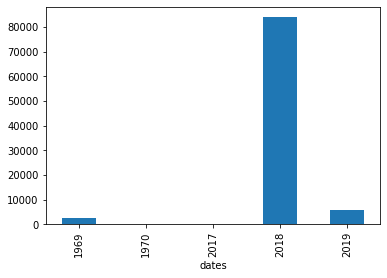

dates
1969     2457
1970        2
2017       25
2018    84014
2019     5890
Name: dates, dtype: int64

In [17]:
# Look at distribution of dates
product_descriptions['dates'].groupby(product_descriptions["dates"].dt.year).count().plot(kind='bar')
plt.show()
product_descriptions['dates'].groupby(product_descriptions["dates"].dt.year).count()

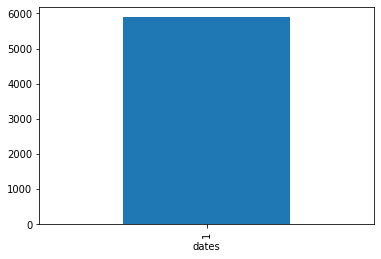

dates
1    5890
Name: dates, dtype: int64

In [18]:
# Plot the 2019 dates
after_2019 = product_descriptions['dates'] > datetime(2019,1,1)
after_2019_df = product_descriptions[after_2019]
after_2019_df['dates'].groupby(after_2019_df["dates"].dt.month).count().plot(kind='bar')
plt.show()

after_2019_df['dates'].groupby(after_2019_df["dates"].dt.month).count()

#after_2019

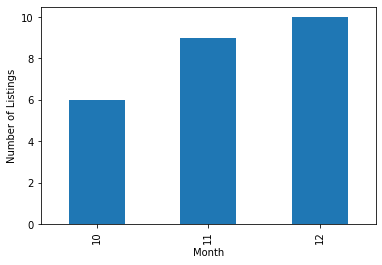

In [19]:
# Plot the 2017 dates
before_2018 = product_descriptions['dates'] < datetime(2018,1,1)
after_2016 = product_descriptions['dates'] > datetime(2016,12,31)
in_2017_df = product_descriptions[after_2016 & before_2018]
in_2017_df['dates'].groupby(in_2017_df["dates"].dt.month).count().plot(kind='bar')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.show()

In [20]:
# Filter out the 1969/1970/2019 dates
# good_dates = product_desci
before_2019 = product_descriptions['dates'] < datetime(2019,2,1)
after_2017 = product_descriptions['dates'] > datetime(2018,4,1)
df = product_descriptions[before_2019 & after_2017]

In [21]:
product_descriptions.head()

,trans_id,mkt_id,vendor_id,vendor_name,buyer_name,rating,comment,date,bitcoin_amt,USD,EUR,buyer_#_orders,buyer_value_orders,product_id,product_mkt_id,product_title,dates,tokenized_titles,drug_prediction
9430,'10528,1,590,superclr,#####,5.0,Vendor did a great job 5 across the board exce...,20181102064301,-1.0,416.000,-1.0,-1,-1,110,714882.72220,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",[heroin]
9431,'10529,1,590,superclr,#####,5.0,GREAT,20181110064301,-1.0,416.000,-1.0,-1,-1,110,714882.72220,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",[heroin]
9432,'10530,1,1013,REAL_MEGASTORE,#####,5.0,Enter your comments here,20181227064306,-1.0,3.120,-1.0,-1,-1,111,141915.284891,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,"[?, cravetv.ca, ?, premium]",[]
9433,'10531,1,1013,REAL_MEGASTORE,#####,5.0,Enter your comments here,20181227064306,-1.0,3.120,-1.0,-1,-1,111,141915.284891,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,"[?, cravetv.ca, ?, premium]",[]
9434,'10532,1,92,OnionKings,#####,5.0,Kanon. 5/5/5,19691231190000,-1.0,109.119,-1.0,-1,-1,112,812534.21917,Rivotril 2mg från apotek (Roche) [100st],1969-12-31 19:00:00,"[rivotril, 2, mg, från, apotek, (, roche, ), [...",[benzodiazepines]


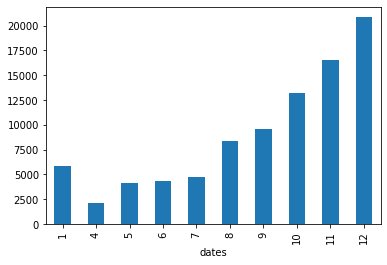

dates
1      5890
4      2103
5      4164
6      4316
7      4786
8      8382
9      9607
10    13225
11    16497
12    20872
Name: dates, dtype: int64


89842

In [22]:
# Plot 2018 dates
df['dates'].groupby(df["dates"].dt.month).count().plot(kind='bar')
plt.show()

monthly_listings = df['dates'].groupby(df["dates"].dt.month).count()
total_listings = sum(df['dates'].groupby(df["dates"].dt.month).count())

print(monthly_listings)
total_listings
#percentage_of_listings = 

In [23]:
df.shape
df.head()

,trans_id,mkt_id,vendor_id,vendor_name,buyer_name,rating,comment,date,bitcoin_amt,USD,EUR,buyer_#_orders,buyer_value_orders,product_id,product_mkt_id,product_title,dates,tokenized_titles,drug_prediction
9430,'10528,1,590,superclr,#####,5.0,Vendor did a great job 5 across the board exce...,20181102064301,-1.0,416.000,-1.0,-1,-1,110,714882.72220,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",[heroin]
9431,'10529,1,590,superclr,#####,5.0,GREAT,20181110064301,-1.0,416.000,-1.0,-1,-1,110,714882.72220,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",[heroin]
9432,'10530,1,1013,REAL_MEGASTORE,#####,5.0,Enter your comments here,20181227064306,-1.0,3.120,-1.0,-1,-1,111,141915.284891,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,"[?, cravetv.ca, ?, premium]",[]
9433,'10531,1,1013,REAL_MEGASTORE,#####,5.0,Enter your comments here,20181227064306,-1.0,3.120,-1.0,-1,-1,111,141915.284891,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,"[?, cravetv.ca, ?, premium]",[]
9435,'10533,1,92,OnionKings,#####,5.0,Toppklass!! Snabb leverans. Allt perfekt!!!,20181221064311,-1.0,109.119,-1.0,-1,-1,112,812534.21917,Rivotril 2mg från apotek (Roche) [100st],2018-12-21 06:43:11,"[rivotril, 2, mg, från, apotek, (, roche, ), [...",[benzodiazepines]


In [24]:
df = product_descriptions
df.columns

Index(['trans_id', 'mkt_id', 'vendor_id', 'vendor_name', 'buyer_name',
       'rating', 'comment', 'date', 'bitcoin_amt', 'USD', 'EUR',
       'buyer_#_orders', 'buyer_value_orders', 'product_id', 'product_mkt_id',
       'product_title', 'dates', 'tokenized_titles', 'drug_prediction'],
      dtype='object')

In [25]:
df.head()

,trans_id,mkt_id,vendor_id,vendor_name,buyer_name,rating,comment,date,bitcoin_amt,USD,EUR,buyer_#_orders,buyer_value_orders,product_id,product_mkt_id,product_title,dates,tokenized_titles,drug_prediction
9430,'10528,1,590,superclr,#####,5.0,Vendor did a great job 5 across the board exce...,20181102064301,-1.0,416.000,-1.0,-1,-1,110,714882.72220,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",[heroin]
9431,'10529,1,590,superclr,#####,5.0,GREAT,20181110064301,-1.0,416.000,-1.0,-1,-1,110,714882.72220,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",[heroin]
9432,'10530,1,1013,REAL_MEGASTORE,#####,5.0,Enter your comments here,20181227064306,-1.0,3.120,-1.0,-1,-1,111,141915.284891,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,"[?, cravetv.ca, ?, premium]",[]
9433,'10531,1,1013,REAL_MEGASTORE,#####,5.0,Enter your comments here,20181227064306,-1.0,3.120,-1.0,-1,-1,111,141915.284891,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,"[?, cravetv.ca, ?, premium]",[]
9434,'10532,1,92,OnionKings,#####,5.0,Kanon. 5/5/5,19691231190000,-1.0,109.119,-1.0,-1,-1,112,812534.21917,Rivotril 2mg från apotek (Roche) [100st],1969-12-31 19:00:00,"[rivotril, 2, mg, från, apotek, (, roche, ), [...",[benzodiazepines]


In [26]:
# Get subset of columns that we care about
# drug_data = copy.deepcopy(df.iloc[:,[0,2,3,15,16,18]])
drug_data = copy.deepcopy(df.loc[:,['trans_id','vendor_id','vendor_name','bitcoin_amt','USD',
                                    'product_title','dates', 'drug_prediction']])
drug_data.columns = ['transaction_id','vendor_id','vendor_name', 'bitcoin_amt','USD',
                     'product_description','date', 'drug_prediction']
# drug_data.columns = ['transaction_id','vendor_id','vendor_name', 'product_description','date', 'drug_prediction']

In [27]:
drug_data.head()

,transaction_id,vendor_id,vendor_name,bitcoin_amt,USD,product_description,date,drug_prediction
9430,'10528,590,superclr,-1.0,416.000,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,[heroin]
9431,'10529,590,superclr,-1.0,416.000,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,[heroin]
9432,'10530,1013,REAL_MEGASTORE,-1.0,3.120,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,[]
9433,'10531,1013,REAL_MEGASTORE,-1.0,3.120,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,[]
9434,'10532,92,OnionKings,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],1969-12-31 19:00:00,[benzodiazepines]


Pickle the dataframe (so that it can be used in another file)

In [28]:
import pickle
file = open('drug_data','wb')
pickle.dump(drug_data, file)
file.close()

# Remove not_drugs

In [29]:
def isDrug(categoryList):
    return('not_drugs' not in categoryList)
row_is_drug = drug_data['drug_prediction'].apply(isDrug)
drug_data = drug_data[row_is_drug]

# Count number of assigned categories for each review

In [30]:
# Count categories for each listing
print('Count number of labels for each listing:')
print(drug_data['drug_prediction'].apply(len).groupby(drug_data['drug_prediction'].apply(len)).count())

Count number of labels for each listing:
drug_prediction
0     7212
1    68378
2     6044
3      224
Name: drug_prediction, dtype: int64


In [31]:
cond1 = drug_data['drug_prediction'].apply(len) != 1
problems = copy.deepcopy(drug_data[cond1])

In [32]:
problems.shape
problems.head()

,transaction_id,vendor_id,vendor_name,bitcoin_amt,USD,product_description,date,drug_prediction
9432,'10530,1013,REAL_MEGASTORE,-1.0,3.1200,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,[]
9433,'10531,1013,REAL_MEGASTORE,-1.0,3.1200,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,[]
9453,'10551,1866,SweShrooms,-1.0,16.0657,SweShrooms - Cubensis Mycelium (4 Strains) 1 st,2018-12-20 06:43:16,"[marijuana, psilocybin]"
9454,'10552,1866,SweShrooms,-1.0,16.0657,SweShrooms - Cubensis Mycelium (4 Strains) 1 st,2018-12-23 06:43:16,"[marijuana, psilocybin]"
9455,'10553,1866,SweShrooms,-1.0,16.0657,SweShrooms - Cubensis Mycelium (4 Strains) 1 st,2018-12-21 06:43:16,"[marijuana, psilocybin]"


In [33]:
problems.to_csv('problems.csv')

# Get reviews with only 1 category

In [34]:
# Get listings with fewer than 1 category
cond1 = drug_data['drug_prediction'].apply(len) < 2
cond2 = drug_data['drug_prediction'].apply(len) > 0
drug_df = copy.deepcopy(drug_data[cond1 & cond2])

# Get first string in one element list of strings
# Input: list of strings
def getFirst(mylist):
    return(mylist[0])
drug_df['drug_prediction'] = drug_df['drug_prediction'].apply(getFirst)

##  Extract price information

In [36]:
from datetime import datetime
#bitcoin to USD file
btc_price = pd.read_csv('btc_data.csv')

# convert dates to datetime.date
btc_date = []
for date in btc_price.loc[:,'Date']:
    btc_date.append(datetime.strptime(date, '%m/%d/%Y').date())

In [37]:
# Function to convert BTC to USD
def btc_to_usd(df_row):
#     Function takes in a row of a Pandas dataframe (drug_df)
#     Returns: USD equivalent amount if amount can be converted; `None' otherwise
    btc_amt = df_row['bitcoin_amt']
    date = df_row['date'].date()
    if btc_amt != -1.0:
        if date in set(dict_btc.keys()):
            return(round(float(btc_amt * dict_btc[date]),2))
    else:
        return(df_row['USD'])

In [38]:
# Dictionary with conversion values (BTC to USD)
dict_btc = dict(zip(btc_date, btc_price['Open'])) # store the bitcoin price as dict

# Apply function to dataframe; i.e. convert bitcoin amount to USD
drug_df['USD'] = drug_df.apply(btc_to_usd, axis = 1)

In [39]:
drug_df.tail()

,transaction_id,vendor_id,vendor_name,bitcoin_amt,USD,product_description,date,drug_prediction
119866,'120964,417,dare-devil666,0.0052,18.03,10 Gram Speed Paste 76% Purity PINK PANTHER HQ,2018-12-11 14:29:43,methamphetamine
119867,'120965,417,dare-devil666,0.0052,25.01,10 Gram Speed Paste 76% Purity PINK PANTHER HQ,2018-11-20 14:29:43,methamphetamine
119868,'120966,417,dare-devil666,0.0052,18.68,10 Gram Speed Paste 76% Purity PINK PANTHER HQ,2018-12-10 14:29:43,methamphetamine
119869,'120967,3181,aKINDercare,-1.0000,80.60,SALE!! SFV OG Cannabis Vape Oil | 50% THC | 10ml,2019-01-18 14:29:52,marijuana
119870,'120968,3181,aKINDercare,-1.0000,80.60,SALE!! SFV OG Cannabis Vape Oil | 50% THC | 10ml,2019-01-17 14:29:52,marijuana


Pickle the dataframe (so that it can be used in another file)

In [40]:
import pickle
file = open('drug_df','wb')
pickle.dump(drug_df, file)
file.close()